***01418323-60 Introduction to Data Science***

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Visualize the data

In [2]:
# อ่านไฟล์ csv ที่เก็บข้อมูล
df = pd.read_csv('./Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


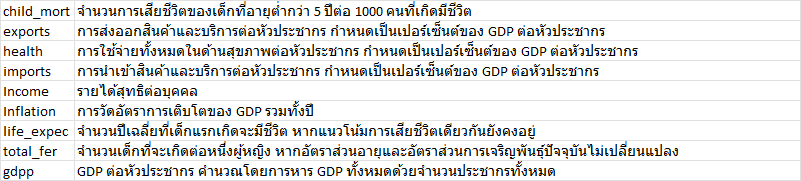

C:\Users\puemm\AppData\Local\Temp\ipykernel_4732\3424168142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


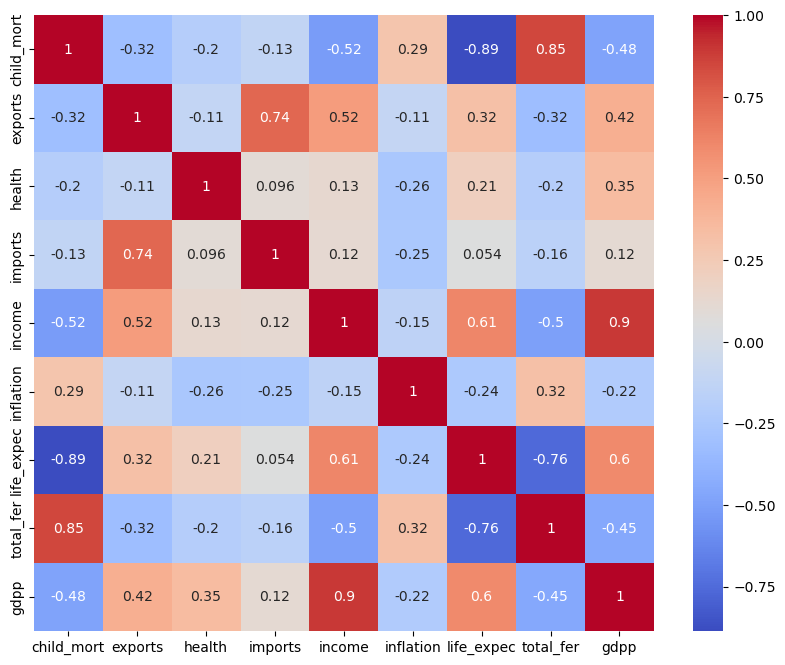

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

เป็นการพล็อตเพื่อดูความสัมพันธ์ระหว่างสินค้านำเข้ากับสินค้าที่ส่งออกซึ่งจะเห็นได้ว่าสินค้านำเข้าและส่งออกจะไม่ได้มีความแตกต่างกันมาก
นักดังนั้นจึงสรุปได้ว่าประเทศได้มีการส่งออกและนำเข้าที่มีปริมาณใกล้เคียงกัน

<AxesSubplot:xlabel='imports', ylabel='exports'>

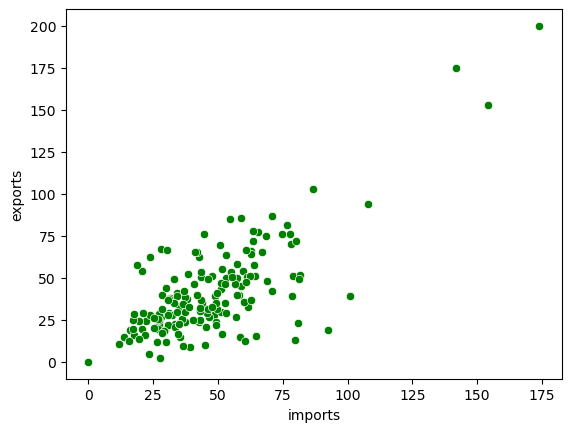

In [4]:
sns.scatterplot(data = df, x = 'imports', y = 'exports', color = 'g')

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

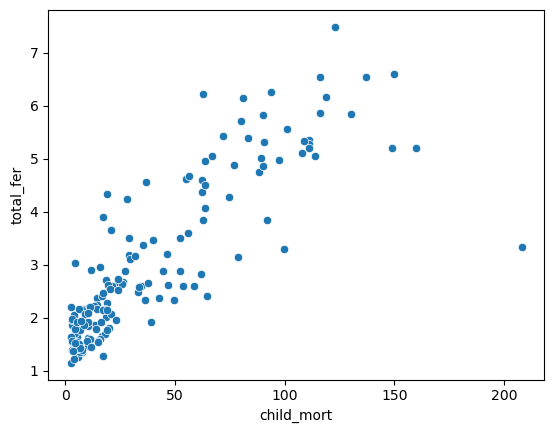

In [5]:
sns.scatterplot(data = df, x = 'child_mort', y = 'total_fer')

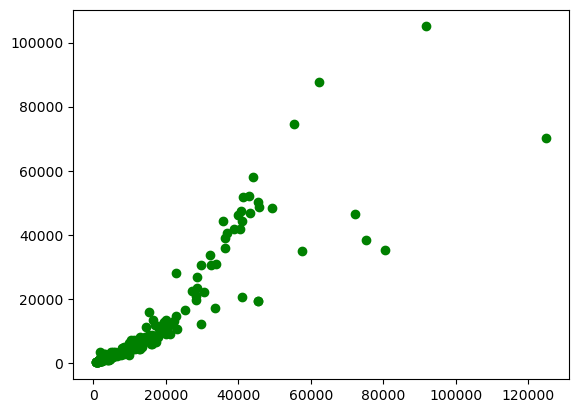

In [6]:
plt.scatter(data = df, x = 'income', y = 'gdpp',c= 'g')

เป็นการพล็อตเพื่อดูความสัมพันธ์ระหว่างรายได้กับ gdp โดยมีขอบเขตรายได้ตั้งแต่ 0 ถึง 100,000 เพื่อที่ได้รู้ว่ารายได้เท่านี้จะมี gdp เท่าไหร่ซึ่งได้รู้ว่ารายได้เท่านี้จะมีรายได้ที่สูงขึ้น ค่า gdp ก็มีแนวโน้มสูงขึ้นตามไปด้วย

### Machine Learning

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

การทำนายอัตราการเกิดลูกของประเทศไทย
อัตราการเสียชีวิตของเด็กอายุต่ำกว่า 5 ปี จากข้อมูลที่ได้จากการวิเคราะห์ข้อมูล
อัตราการเกิด และการเสียชีวิตของเด็กอายุต่ำกว่า 5 ปี มีความสัมพันธ์กัน โดยเมื่ออัตราการเสียชีวิตของเด็กอายุต่ำกว่า 5 ปี มีค่ามากจะทำให้อัตราการเกิดลูกลดลง
และเมื่อ รายได้สุทธิต่อคน มีค่ามากจะทำให้อัตราการเกิดลูกลดลง

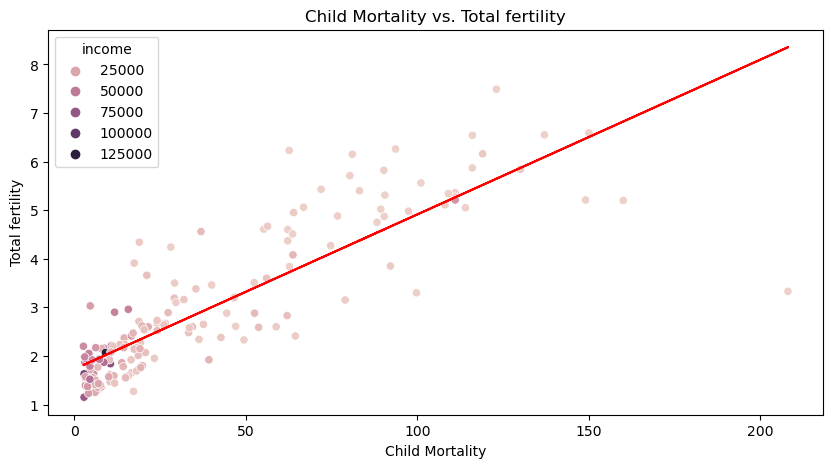

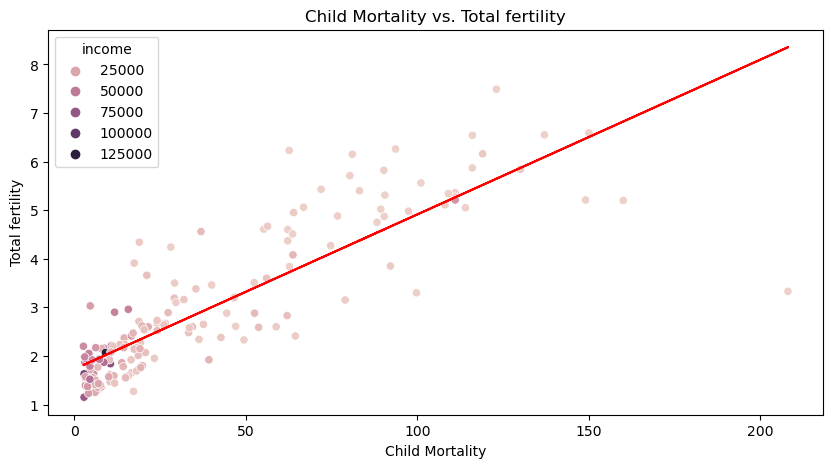

In [13]:
# child_mort = อัตราการเสียชีวิตของเด็กอายุต่ำกว่า 5 ปี
# total_fer = อัตราการเกิดลูก
x = df['child_mort'].values.reshape(-1, 1)
y = df['total_fer'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 5))
sns.scatterplot(x='child_mort', y='total_fer', data=df, hue='income')
plt.plot(x, y_pred, color='red')
plt.title('Child Mortality vs. Total fertility')
# จำนวนเสียชีวิตของเด็กอายุต่ำกว่า 5 ปี
plt.xlabel('Child Mortality')
# อัตราการเกิดลูก
plt.ylabel('Total fertility')
plt.show()
